* MSV_HoVaTen:
521H0501_Phan Minh Hoàng,
521H0398_Lê Nguyễn Viết Hiệp,
521H0276_Trang Sĩ Nam



In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [300]:
data = pd.read_csv('bike_buyers.csv')

In [301]:
data = data.dropna()

In [302]:
data.duplicated().value_counts()

False    952
dtype: int64

In [303]:
data = data.drop_duplicates()

* Transformation

In [304]:
# Tranform data
from sklearn.preprocessing import LabelEncoder

types = data.dtypes
names = list(data.columns)

le = LabelEncoder()
for i in range(len(types)):
    if types.iloc[i]=='object':
        le.fit_transform(data[names[i]])
        data[names[i]] = le.transform(data[names[i]])

* Normalization


In [305]:
from sklearn.preprocessing import MinMaxScaler
features = data.drop(['Purchased Bike'], axis=1)

scaler = MinMaxScaler()
model= scaler.fit(features)
scaled_data= pd.DataFrame(model.transform(features))

* Feature Selection

In [306]:
# split data
X = scaled_data
y = data['Purchased Bike']

<Axes: >

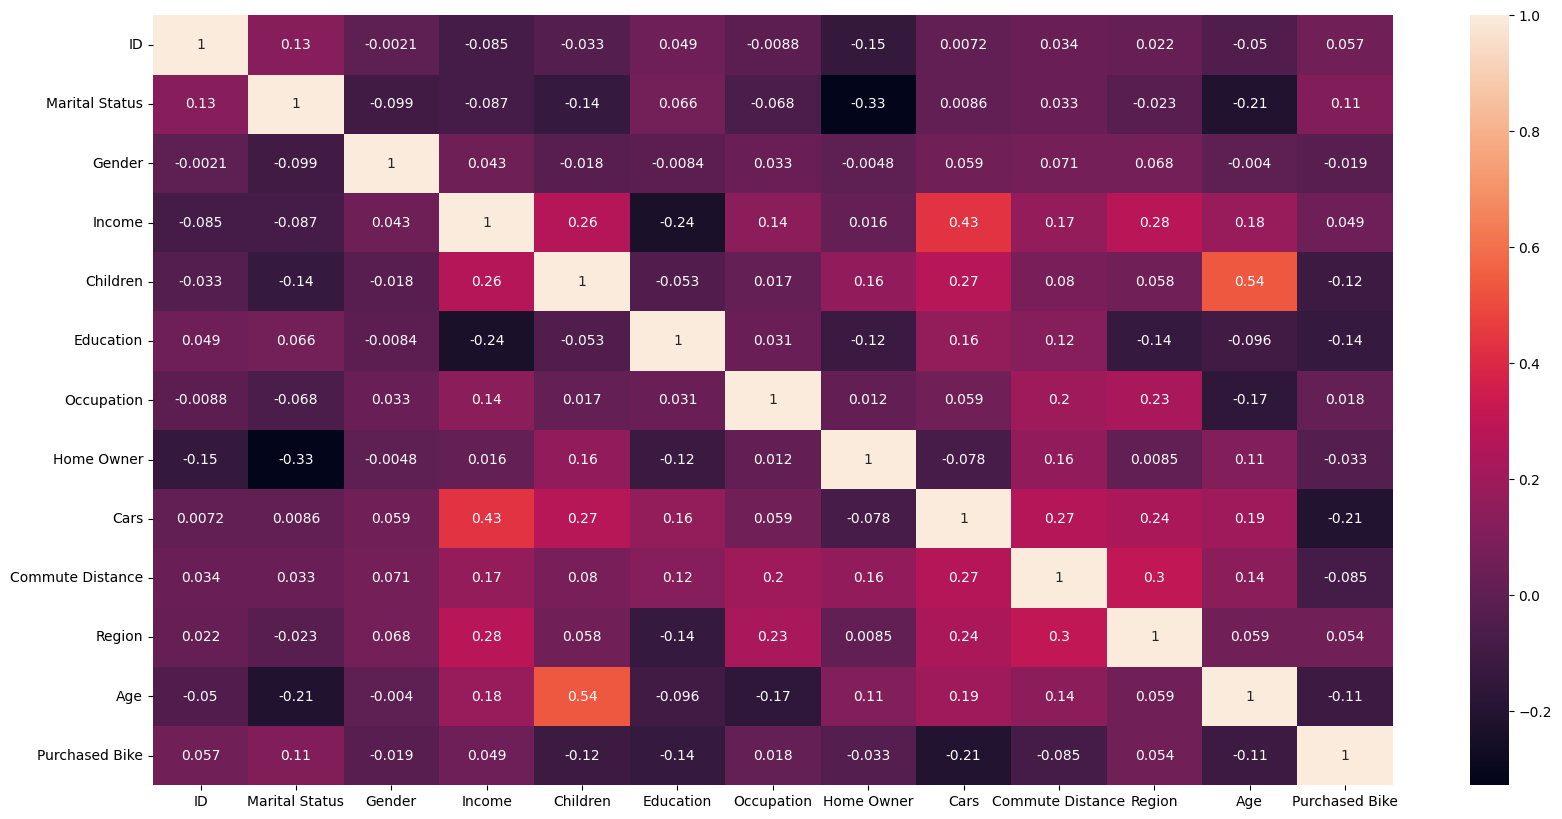

In [307]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)

In [308]:
data = data.drop(['ID'], axis=1)

* FFNN

In [309]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

In [310]:
model = tf.keras.models.Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='tanh'))
model.add(Dropout(0.2)) 
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(64, activation='tanh'))
model.add(Dense(32, activation='tanh'))
model.add(Dense(16, activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Tránh Overfitting:
- Dropout Layers
- Early Stopping
- Normalizaiton (MinMaxScaler)
- Features Selection

In [ ]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)
history = model.fit(X_train, Y_train, epochs=200, batch_size=512, callbacks=[earlystopping], validation_data=[X_test, Y_test])

In [312]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

6/6 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.5916
Test accuracy: 59.16%


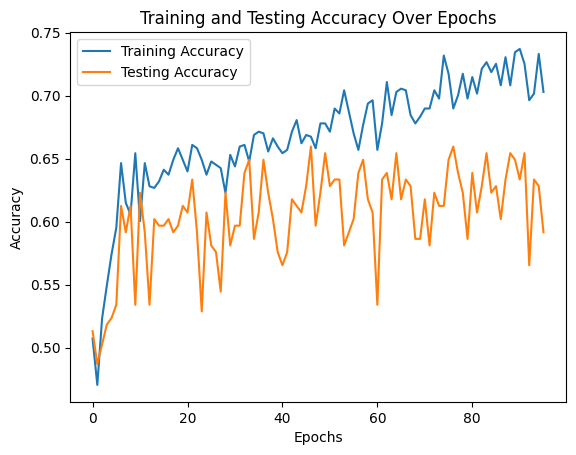

In [313]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.title('Training and Testing Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()